### Puxar base de dados

In [1]:
import pandas as pd
tabela = pd.read_csv('exportacoes_franca.csv')
display(tabela)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
142358,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045


### Informações Gerais

Quantas linhas têm a tabela? Existe algum valor vazio que deveria ser tratado?

In [2]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB


### Como foi a evolução das exportações para a frança ao longo dos anos?

Crie uma tabela com os anos de 2016, 2017, 2018, 2019 e 2020 e o valor US$ de exportações

,US$ FOB
Year,
2016,4615500082
2017,4448705456
2018,5239424416
2019,5218723612
2020,3967594810


<Axes: title={'center': 'exportações por ano'}, xlabel='Anos', ylabel='US$'>

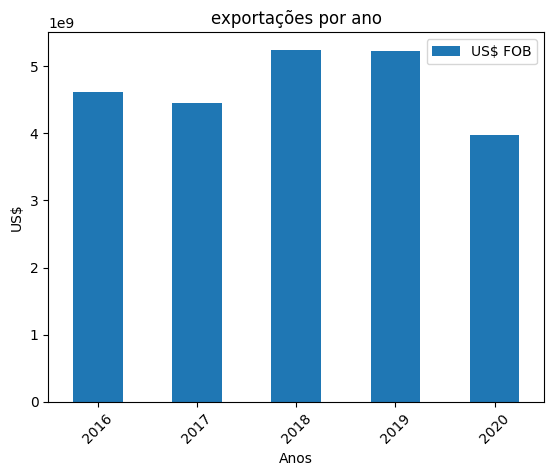

In [3]:
evo_exp_df = tabela.groupby('Year').sum(numeric_only=True)
evo_exp_df = evo_exp_df[["US$ FOB"]]
display(evo_exp_df)
evo_exp_df.plot(kind='bar', xlabel='Anos', ylabel='US$', title='exportações por ano', rot=45)


### Quais os produtos mais exportados ao longo de todo o período?

Queremos saber os produtos com maior valor US$ de exportação

In [9]:
mais_exportados = tabela[['SH2 Description', 'US$ FOB']].groupby('SH2 Description').sum()
def formatar(valor):
    valor_formatado = f"US${valor:,}"
    return valor_formatado
mais_exportados = mais_exportados.sort_values(by='US$ FOB', ascending= False)
mais_exportados["US$ FOB"] = mais_exportados["US$ FOB"].apply(formatar)
display(mais_exportados)

,US$ FOB
SH2 Description,
Residues and waste from the food industries; others,"US$5,641,498,484"
"Ores, slag and ash","US$3,404,353,274"
"Nuclear reactors, boilers, machinery and mechanical appliances; others","US$1,889,781,694"
"Pulp of wood or of other fibrous cellulosic material, others,","US$1,855,424,642"
"Aircraft, spacecraft, and parts thereof","US$1,253,007,710"
...,...
"Umbrellas, sun umbrellas, walking-sticks, seat-sticks, whips, riding-crops, others","US$18,872"
Cork and articles of cork,"US$10,974"
"Wool, fine or coarse animal hair; horsehair yarn and woven fabric","US$2,540"


### Em 2020 qual cidade mais exportou para a França?
Em valores US$

### Quais os produtos mais exportados (em US$) que as 2 maiores cidades (em exportação em 2020) exportaram?